# **Introduction**

***Independent coffee shops pepper the light rail corridor in Midtown & Downtown Phoenix, creating a vibrant, interconnected community. Forget Portland or Seattle – Phoenix stands on its own as a unique coffee destination.***




[Phoenix](https://dtphx.org/) —the fifth most populous city in the United States—has worked hard to forge a balance between urbanism and rurality. It is a metropolis, but one whose main attraction may be the great outdoors nearby. As the city continues to grow, Phoenix has seen generations of people committed to staying here joined by a new influx of young people with a mind to quality food and drink. These newcomers tend to see the city as ripe for innovation, and in synthesis with the city’s appreciation for nature, have shaped a movement known as New Arizonan. Over the last few years, this emerging ethos has churned out its fair share of renowned brewers, chefs, and mixologists. In the midst of aggressively growing food and craft beer scenes, Phoenix coffee, too, has quietly begun to come into its own—feeling now more than ever like it’s on the verge of a boom. Below are a few cafes that have been at the forefront of the culture and which should be watched for new developments.

# **Business Problem**


The main idea behind the project is to analyse the Coffee chains in Phoenix and  look out for the areas where opening this new coffee shop would be a grand success.



My client is a successful entrepreneur in California. It's only been 2 years since he started his business. But now, in 2020, He has 24 Coffee Shops in big cities of around California like San Jose, San Francisco, Los Angelos and San Diego. Now, he wants to expand his business in other states and make his 25th Coffee Shop a success. He has a particular interest in Arizona. So, he wants to open a new restaurant in Phoenix.
 

# **Target Audience**

The target market for ***The Coffee Shop Project*** will be the working professionals downtown and the college students at the two local universities. The project is also beneficial to anyone who is looking to start a new Coffee Shop in Phoenix. The audience is quite large and includes the major brands like Starbucks Coffee, The Coffee Bean and Tea Leaf. The project can also benefit some locally owned coffee shops to improve their business prospects. 



Our target market of higher-educated people is interested in helping others in a tangible way through their affinity for specialty coffee drinks. According to the [Specialty Coffee Association](https://sca.coffee/), the U.S. market share of specialty coffee has grown 19% in just seven years and is expected to double by the year 2050. We intend to capture the attention of the roughly 18,000 millennials in Bartlesville who would look formore than just a caffeine fix.


# **Data Acquisition** 

In order to cluster & segment the neighborhoods and explore them, we will essentially need a dataset that contains the boroughs and the neighborhoods that exist in each borough as well as the the latitude and logitude coordinates of each neighborhood.

- **Web Scrape Wikipedia Page:** [List of Neighborhood in Arizona](https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_Arizona) page gives us all the information about the neighborhoods present in Arizona. This page has the Neighborhood, borough , population , area and density of all the neighborhoods present in Phoenix. We can also directly download the information from this [link](https://www.downloadexcelfiles.com/sites/default/files/docs/list-cities-arizona-state-us-166j.csv).


- **Foursquare API:** Arizona geographical coordinates data will be utilized as input for the Foursquare API, that will be leveraged to provision venues information for each neighborhood. This link re-directs you to [Foursquare API](https://foursquare.com/developers/apps).


# **Importing Helper Functions**

In [ ]:
import numpy as np # library to handle data in a vectorized manner
import pandas as pd # library for data analsysis

import requests
import urllib.request

# import the BeautifulSoup library so we can parse HTML and XML documents
from bs4 import BeautifulSoup 

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files
import os

!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Visualization and associated plotting modules
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.colors as colors
%matplotlib inline

import seaborn as sns 

!pip install folium
import folium # map rendering library
from folium.plugins import MiniMap
from folium.plugins import HeatMap

# import k-means for clustering 
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score  #import silhouette_score to select the value of K

from IPython.display import display

from warnings import filterwarnings
filterwarnings('ignore')

print('Libraries imported.')

Libraries imported.


# **Scraping Wikipedia for Neighborhood data in Arizona, US**

Extract relevant data - ***Neighborhood, County, Population*** by looping through the table until there are no more listing in that page.

We could also directly download the required data from this [link](https://www.downloadexcelfiles.com/sites/default/files/docs/list-cities-arizona-state-us-166j.csv).

In [ ]:
# specify which URL/web page we are going to be scraping
url = "https://en.wikipedia.org/wiki/List_of_cities_and_towns_in_Arizona"

# open the url using urllib.request and put the HTML into the page variable
page = urllib.request.urlopen(url)

# parse the HTML from our URL into the BeautifulSoup parse tree format
soup = BeautifulSoup(page, "lxml")
print(soup.prettify())

<!DOCTYPE html>
<html class="client-nojs" dir="ltr" lang="en">
 <head>
  <meta charset="utf-8"/>
  <title>
   List of cities and towns in Arizona - Wikipedia
  </title>
  <script>
   document.documentElement.className="client-js";RLCONF={"wgBreakFrames":!1,"wgSeparatorTransformTable":["",""],"wgDigitTransformTable":["",""],"wgDefaultDateFormat":"dmy","wgMonthNames":["","January","February","March","April","May","June","July","August","September","October","November","December"],"wgRequestId":"79783a07-ddfe-4f53-82c4-2a9f73c5371a","wgCSPNonce":!1,"wgCanonicalNamespace":"","wgCanonicalSpecialPageName":!1,"wgNamespaceNumber":0,"wgPageName":"List_of_cities_and_towns_in_Arizona","wgTitle":"List of cities and towns in Arizona","wgCurRevisionId":962848905,"wgRevisionId":962848905,"wgArticleId":730206,"wgIsArticle":!0,"wgIsRedirect":!1,"wgAction":"view","wgUserName":null,"wgUserGroups":["*"],"wgCategories":["Featured lists","Cities in Arizona","Local government in Arizona","Lists of cities in 

In [ ]:
table=soup.find('table', class_='wikitable sortable')
print(table.prettify())

<table class="wikitable sortable">
 <tbody>
  <tr>
   <th rowspan="2" style="background-color:#CEE0F2;">
    Name
   </th>
   <th rowspan="2" style="background-color:#CEE0F2;">
    Type
    <sup class="reference" id="cite_ref-13">
     <a href="#cite_note-13">
      [13]
     </a>
    </sup>
   </th>
   <th rowspan="2" style="background-color:#CEE0F2;">
    <a href="/wiki/List_of_counties_in_Arizona" title="List of counties in Arizona">
     County
    </a>
   </th>
   <th rowspan="2" style="background-color:#CEE0F2;">
    Population
    <br/>
    (2010)
    <sup class="reference" id="cite_ref-census06_14-0">
     <a href="#cite_note-census06-14">
      [14]
     </a>
    </sup>
   </th>
   <th colspan="2" style="background-color:#CEE0F2;">
    Area (2010)
    <sup class="reference" id="cite_ref-2010place_15-0">
     <a href="#cite_note-2010place-15">
      [15]
     </a>
    </sup>
   </th>
   <th rowspan="2" style="background-color:#CEE0F2;">
    Population density (2010)
    <sup cl

**Converting the scraped page into a dataframe**

In [ ]:
A=[]
B=[]
C=[]
D=[]
E=[]
F=[]
G=[]
H=[]

for row in table.findAll('tr'):
    cells=row.findAll('td')
    if len(cells)==8:
        A.append(cells[0].find(text=True).rstrip('\n'))
        B.append(cells[1].find(text=True).rstrip('\n'))
        C.append(cells[2].find(text=True).rstrip('\n'))
        D.append(cells[3].find(text=True).rstrip('\n'))
        E.append(cells[4].find(text=True).rstrip('\n'))
        F.append(cells[5].find(text=True).rstrip('\n'))
        G.append(cells[6].find(text=True).strip('\n'))
        H.append(cells[7].find(text=True).rstrip('\n'))

arizona_data=pd.DataFrame({'Name': A,
                            'Type': B,
                            'County': C,
                            'Population': D,
                            'Area (2010) sq.mi': E,
                            'Area (2010) km2': F,
                            'Population density (2010)': G,
                            'Incorporated': H})

arizona_data

Name  Type      County Population Area (2010) sq.mi  \
0        Apache Junction  City       Pinal     35,840             35.00   
1               Avondale  City    Maricopa     76,238             45.65   
2                 Benson  City     Cochise      5,105             41.46   
3                 Bisbee  City     Cochise      5,575              5.16   
4                Buckeye  City    Maricopa     50,876            375.39   
5          Bullhead City  City      Mohave     39,540             60.18   
6             Camp Verde  Town     Yavapai     10,873             43.15   
7               Carefree  Town    Maricopa      3,363              8.81   
8            Casa Grande  City       Pinal     48,571            109.67   
9             Cave Creek  Town    Maricopa      5,015             37.92   
10              Chandler  City    Maricopa    236,123             64.52   
11          Chino Valley  Town     Yavapai     10,817             63.43   
12             Clarkdale  Town     Yavapai      4,097             10.57   
13               Clifton  Town    Greenlee      3,311              15.0   
14         Colorado City  Town      Mohave      4,821             10.34   
15              Coolidge  City       Pinal     11,825             56.58   
16            Cottonwood  City     Yavapai     11,265             16.41   
17        Dewey-Humboldt  Town     Yavapai      3,894             18.59   
18               Douglas  City     Cochise     17,378              9.98   
19                Duncan  Town    Greenlee        696              2.16   
20                 Eagar  Town      Apache      4,885             11.24   
21             El Mirage  City    Maricopa     31,797             10.09   
22                  Eloy  City       Pinal     16,631            111.57   
23             Flagstaff  City    Coconino     65,870             63.91   
24              Florence  Town       Pinal     25,536             52.49   
25        Fountain Hills  Town    Maricopa     22,489             20.42   
26              Fredonia  Town    Coconino      1,314              7.32   
27             Gila Bend  Town    Maricopa      1,922             55.37   
28               Gilbert  Town    Maricopa    208,453             68.15   
29              Glendale  City    Maricopa    226,721             60.13   
30                 Globe  City        Gila      7,532             18.20   
31              Goodyear  City    Maricopa     65,275            191.52   
32             Guadalupe  Town    Maricopa      5,523              0.81   
33                Hayden  Town        Gila        662              1.27   
34              Holbrook  City      Navajo      5,053             17.37   
35         Huachuca City  Town     Cochise      1,853              2.81   
36                Jerome  Town     Yavapai        444              0.86   
37                Kearny  Town       Pinal      1,950              2.81   
38               Kingman  City      Mohave     28,068             34.82   
39      Lake Havasu City  City      Mohave     52,527             44.48   
40       Litchfield Park  City    Maricopa      5,476              3.34   
41               Mammoth  Town       Pinal      1,426              1.04   
42                Marana  Town        Pima     34,961            122.20   
43              Maricopa  City       Pinal     43,482             47.57   
44                  Mesa  City    Maricopa    439,041            137.06   
45                 Miami  Town        Gila      1,837              0.88   
46               Nogales  City  Santa Cruz     20,837             20.84   
47            Oro Valley  Town        Pima     41,011             35.64   
48                  Page  City    Coconino      7,247             16.64   
49       Paradise Valley  Town    Maricopa     12,820             15.46   
50                Parker  Town      La Paz      3,083             21.99   
51             Patagonia  Town  Santa Cruz        913              1.29   
52                Payson  Town        Gila   

# **Extracting Latitudes and Longitudes using Geopy**

**Use geopy library to get the latitude and longitude values of Phoenix, Arionza for mapping.**

In [ ]:
address = 'Phoenix, Arizona'

geolocator = Nominatim(user_agent= 'arizona')
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Phoenix, Arizona are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Phoenix, Arizona are 33.4484367, -112.0741417.


In [ ]:
az = arizona_data.drop(['Type' , 'Population',	'Area (2010) sq.mi',	'Area (2010) km2',	'Population density (2010)',	'Incorporated'], axis =1)
az.rename(columns = {'Name': 'Neighborhood', 'County': 'Borough'}, inplace= True)

print('Obtaining location addresses ', end = '')
for borough, neighborhood in zip(az['Borough'],az['Neighborhood']):   
    #find the location data, ignore the neighborhoods that are unable to be located by Nominatim
    geolocator = Nominatim(user_agent = 'arizona')
    location = geolocator.geocode("{},{},Arizona".format(neighborhood,borough))
    
    #try one more searching
    if location is None: 
        location = geolocator.geocode("{},Arizona".format(neighborhood))
        
    if location is None: 
        print("The location data of {} in {} is not available!".format(neighborhood,borough))
    else:
        az = az.append({
                        'Borough': borough,
                        'Neighborhood': neighborhood,
                        'Latitude': location.latitude,
                        'Longitude': location.longitude}, ignore_index=True)
    print('.', end ='')
    
print('\n Retrieved')
print('\nBefore deleting duplicates - Shape:', az.shape)
az = az.drop([184])
az = az.dropna().sort_values(by = 'Neighborhood') #dropping all null values which has some duplicated data
az.reset_index(drop = True, inplace= True)
az.to_pickle('./az_locations.pkl')
print('After deleting duplicates - Shape:', az.shape)
print()
az

Obtaining location addresses ...........................................................................................The location data of Total Municipalities in — is not available!
..
 Retrieved

Before deleting duplicates - Shape: (185, 4)
After deleting duplicates - Shape: (91, 4)



Neighborhood     Borough   Latitude   Longitude
0    Apache Junction       Pinal  33.415048 -111.549578
1           Avondale    Maricopa  33.435499 -112.349557
2             Benson     Cochise  31.967861 -110.294517
3             Bisbee     Cochise  31.448155 -109.928408
4            Buckeye    Maricopa  33.370275 -112.583867
5      Bullhead City      Mohave  35.147777 -114.568298
6         Camp Verde     Yavapai  34.563636 -111.854318
7           Carefree    Maricopa  33.822261 -111.918203
8        Casa Grande       Pinal  32.879502 -111.757352
9         Cave Creek    Maricopa  33.833333 -111.950833
10          Chandler    Maricopa  33.306222 -111.841332
11      Chino Valley     Yavapai  34.757523 -112.453781
12         Clarkdale     Yavapai  34.771132 -112.057937
13           Clifton    Greenlee  33.050897 -109.296183
14     Colorado City      Mohave  36.990262 -112.975770
15          Coolidge       Pinal  32.977839 -111.517624
16        Cottonwood     Yavapai  34.739489 -112.009794
17    Dewey-Humboldt     Yavapai  34.513845 -112.256011
18           Douglas     Cochise  31.462230 -109.593943
19            Duncan    Greenlee  32.715178 -109.100449
20             Eagar      Apache  34.111158 -109.291475
21         El Mirage    Maricopa  33.613034 -112.324487
22              Eloy       Pinal  32.755700 -111.555042
23         Flagstaff    Coconino  35.198752 -111.651823
24          Florence       Pinal  33.031451 -111.387343
25    Fountain Hills    Maricopa  33.611711 -111.717361
26          Fredonia    Coconino  36.945542 -112.526589
27         Gila Bend    Maricopa  32.947827 -112.716824
28           Gilbert    Maricopa  33.352763 -111.789037
29          Glendale    Maricopa  33.538686 -112.185994
30             Globe        Gila  33.395951 -110.787177
31          Goodyear    Maricopa  33.435367 -112.357601
32         Guadalupe    Maricopa  33.363125 -111.962533
33            Hayden        Gila  32.998027 -110.780857
34          Holbrook      Navajo  34.903706 -110.159316
35     Huachuca City     Cochise  31.627870 -110.333968
36            Jerome     Yavapai  34.748911 -112.113772
37            Kearny       Pinal  33.057009 -110.910666
38           Kingman      Mohave  35.189443 -114.053006
39  Lake Havasu City      Mohave  34.483850 -114.322450
40   Litchfield Park    Maricopa  33.493380 -112.358124
41           Mammoth       Pinal  32.722568 -110.640655
42            Marana        Pima  32.444699 -111.215709
43          Maricopa       Pinal  33.058129 -112.047755
44              Mesa    Maricopa  33.415112 -111.831477
45             Miami        Gila  33.399478 -110.870950
46           Nogales  Santa Cruz  31.340213 -110.936082
47        Oro Valley        Pima  32.390907 -110.966488
48              Page    Coconino  36.914831 -111.457294
49   Paradise Valley    Maricopa  33.542801 -111.955600
50            Parker      La Paz  34.149841 -114.288961
51         Patagonia  Santa Cruz  31.539314 -110.756305
52            Payson        Gila  34.230868 -111.325136
53            Peoria    Maricopa  33.580612 -112.237294
54           Phoenix    Maricopa  33.448437 -112.074142
55              Pima      Graham  32.896175 -109.827581
56  Pinetop-Lakeside      Navajo  34.142544 -109.960384
57          Prescott     Yavapai  34.539996 -112.468762
58   Prescott Valley     Yavapai  34.610024 -112.315721
59        Quartzsite      La Paz  33.663914 -114.229949
60       Queen Creek    Maricopa  33.248386 -111.634158
61           Safford      Graham  32.833955 -109.707580
62         Sahuarita        Pima  31.957582 -110.955646
63          San Luis        Yuma  32.493440 -114.773755
64        Scottsdale    Maricopa  33.494219 -111.926018
65            Sedona     Yavapai  34.850566 -111.830235
66          Show Low      Navajo  34.254208 -110.029833
67      Sierra Vista     Cochise  31.545571 -110.277225
68         Snowflake      Navajo  34.511470 -110.079609
69          Somerton        Yuma  32.596440 -114.709677
70      South Tucson        Pima

**Create a map of Arizona with neighborhoods superimposed on top**

In [ ]:
az_map = folium.Map(location=[latitude, longitude], zoom_start=7)

# set color scheme for the Borough
borough_name = az['Borough'].unique().tolist()
colnum = az['Borough'].unique().size
x = np.arange(colnum)
ys = [i+x+(i*x)**1 for i in range(colnum)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

for lat, lon, neighborhood, borough in zip(az['Latitude'], az['Longitude'], az['Neighborhood'], az['Borough']):
    cluster = borough_name.index(borough)
    label = '{}, {}'.format(neighborhood, borough)
    label = folium.Popup(label, parse_html=True)
    folium.Marker((33.448437, -112.074142),tooltip = 'Phoenix, Arizona').add_to(az_map)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster],
        fill=True,
        fill_color=rainbow[cluster],
        fill_opacity=0.7).add_to(az_map)

minimap = MiniMap()
az_map.add_child(minimap)
az_map.save(os.path.join('./', 'map_1.html'))
az_map

**Phoenix, Arizona, our target location is assumed to be the center. We will calculate the distance between the target and its neighborhoods**

In [ ]:
#function to calculate the distance by using haversine distance

def haversine_distance(lat1, lon1, lat2, lon2):
   r = 6371
   phi1 = np.radians(lat1)
   phi2 = np.radians(lat2)
   delta_phi = np.radians(lat2 - lat1)
   delta_lambda = np.radians(lon2 - lon1)
   a = np.sin(delta_phi / 2)**2 + np.cos(phi1) * np.cos(phi2) *   np.sin(delta_lambda / 2)**2
   res = r * (2 * np.arctan2(np.sqrt(a), np.sqrt(1 - a)))
   return np.round(res, 2)

# Phoenix, Arizona Centers
start_lat, start_lon = 33.4484367, -112.0741417

distances_km = []
for row in az.itertuples(index=False):
   distances_km.append(
       haversine_distance(start_lat, start_lon, row.Latitude, row.Longitude)
   )

az['DistanceFromPhoenix'] = distances_km
az = az.reset_index()
az = az.drop(['index'], axis = 1)
az.to_pickle('./az_distances.pkl')
az.head()

Neighborhood   Borough   Latitude   Longitude  DistanceFromPhoenix
0  Apache Junction     Pinal  33.415048 -111.549578                48.82
1         Avondale  Maricopa  33.435499 -112.349557                25.60
2           Benson   Cochise  31.967861 -110.294517               234.15
3           Bisbee   Cochise  31.448155 -109.928408               300.00
4          Buckeye  Maricopa  33.370275 -112.583867                48.10

# **Foursquare API**

We begin by fetching a total of all venues in Arizona upto a range of 8 Kilometers using the Foursquare API. The Foursquare API has the explore API which allows us to find venue recommendations within a given radius from the given coordinates. We will use this API to find all the venues we need.

**Foursquare Credentials**

In [ ]:
#Use Foursquare to expore the neighborhoods
#My Foursquare Credentials 
CLIENT_ID = '***********************************' 
CLIENT_SECRET = '*********************************' 
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # only return the top 100 venues

We'll call the API over and over till we get all venues from the API within the given distance. The maximum venues this API can fetch is 100, so we will fetch all venues by iteratively calling this API and increasing the offset each time.

- Foursquare API requires client_id, and client_secret to function which can be accessed after creating a developer account.
- The version is a required parameter which defines the date on which we are browsing so that it retrieves the latest data.

**Retrieving Nearby Venues**

In [ ]:
# define a function to expore each city in radius of 8000 meters
def getvenues(nborhood, radius=8000):
    
    venues=pd.DataFrame(columns=['Borough','Neighborhood','Latitude', 'Longitude', 'Venue','Venue_Category', 'Venue_Latitude', 'Venue_Longitude'])
    for borough, neighborhood, lat, lng in zip(nborhood['Borough'], nborhood['Neighborhood'], nborhood['Latitude'], nborhood['Longitude']):
        # create the API request URL
        print(neighborhood)
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
        
        # make the GET request
        results = requests.get(url).json()['response']['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        if results is not None:
            for v in results:
                venues = venues.append({
                           'Borough':borough,
                           'Neighborhood': neighborhood, 
                           'Latitude' : lat,
                           'Longitude' : lng,
                           'Venue': v['venue']['name'], 
                           'Venue_Category': v['venue']['categories'][0]['name'],
                           'Venue_Latitude' : v['venue']['location']['lat'],
                           'Venue_Longitude' : v['venue']['location']['lng']},ignore_index=True)

   
    
    return(venues)

In [ ]:
az_venues = getvenues(az)

Apache Junction
Avondale
Benson
Bisbee
Buckeye
Bullhead City
Camp Verde
Carefree
Casa Grande
Cave Creek
Chandler
Chino Valley
Clarkdale
Clifton
Colorado City
Coolidge
Cottonwood
Dewey-Humboldt
Douglas
Duncan
Eagar
El Mirage
Eloy
Flagstaff
Florence
Fountain Hills
Fredonia
Gila Bend
Gilbert
Glendale
Globe
Goodyear
Guadalupe
Hayden
Holbrook
Huachuca City
Jerome
Kearny
Kingman
Lake Havasu City
Litchfield Park
Mammoth
Marana
Maricopa
Mesa
Miami
Nogales
Oro Valley
Page
Paradise Valley
Parker
Patagonia
Payson
Peoria
Phoenix
Pima
Pinetop-Lakeside
Prescott
Prescott Valley
Quartzsite
Queen Creek
Safford
Sahuarita
San Luis
Scottsdale
Sedona
Show Low
Sierra Vista
Snowflake
Somerton
South Tucson
Springerville
St. Johns
Star Valley
Superior
Surprise
Taylor
Tempe
Thatcher
Tolleson
Tombstone
Tucson
Tusayan
Wellton
Wickenburg
Willcox
Williams
Winkelman
Winslow
Youngtown
Yuma


In [ ]:
print(az_venues.shape)
az_venues.head()

(5123, 8)


Borough     Neighborhood   Latitude   Longitude                    Venue  \
0   Pinal  Apache Junction  33.415048 -111.549578  Handlebar Pub And Grill   
1   Pinal  Apache Junction  33.415048 -111.549578                Walgreens   
2   Pinal  Apache Junction  33.415048 -111.549578             CVS pharmacy   
3   Pinal  Apache Junction  33.415048 -111.549578        Los Gringos Locos   
4   Pinal  Apache Junction  33.415048 -111.549578            Papa Murphy's   

       Venue_Category  Venue_Latitude  Venue_Longitude  
0                 Bar       33.415463      -111.553158  
1            Pharmacy       33.412688      -111.547010  
2            Pharmacy       33.413972      -111.549677  
3  Mexican Restaurant       33.412419      -111.551119  
4         Pizza Place       33.415576      -111.568613


**Let's find out how many unique venues can be curated from all the returned venues**

In [ ]:
print('There are {} distinct venues in {} categories.'.format(len(az_venues['Venue'].unique()),len(az_venues['Venue_Category'].unique())))

There are 2653 distinct venues in 303 categories.


In [ ]:
print(az_venues['Venue_Category'].unique())

['Bar' 'Pharmacy' 'Mexican Restaurant' 'Pizza Place' 'American Restaurant'
 'Farmers Market' 'Bike Shop' 'Country Dance Club' 'Gym' 'Sandwich Place'
 'Taco Place' 'Discount Store' 'Grocery Store' 'New American Restaurant'
 'Italian Restaurant' 'Coffee Shop' 'Seafood Restaurant'
 'Fast Food Restaurant' 'Spa' 'Concert Hall' 'Convenience Store'
 'Cosmetics Shop' 'Furniture / Home Store' 'Pool' 'Juice Bar'
 'Historic Site' 'Breakfast Spot' 'Golf Course' 'Chinese Restaurant'
 'Sports Bar' 'Trail' 'Hardware Store' 'Museum' 'Park' 'Dessert Shop'
 'Antique Shop' 'Bank' 'Bakery' 'Salon / Barbershop' 'Video Store'
 'Steakhouse' 'Home Service' 'Forest' 'BBQ Joint' 'Brewery'
 'Warehouse Store' 'Donut Shop' 'Cajun / Creole Restaurant' 'Wine Shop'
 'Buffet' 'Greek Restaurant' 'Burger Joint' 'Hawaiian Restaurant'
 'Restaurant' 'Baseball Field' 'Ice Cream Shop' 'Bookstore'
 'Baseball Stadium' 'Japanese Restaurant' 'Movie Theater' 'Café'
 'Liquor Store' 'Frozen Yogurt Shop' 'Big Box Store' 'Smoothie Sh

**Analyze the data retrieved in each Venue Category**

In [ ]:
pd.DataFrame(az_venues.groupby(['Venue_Category']).count())

Borough  Neighborhood  Latitude  \
Venue_Category                                                              
ATM                                             3             3         3   
Adult Boutique                                  1             1         1   
Advertising Agency                              1             1         1   
Airport                                        14            14        14   
Airport Terminal                                2             2         2   
American Restaurant                           209           209       209   
Antique Shop                                   13            13        13   
Arcade                                          1             1         1   
Argentinian Restaurant                          1             1         1   
Art Gallery                                     8             8         8   
Art Museum                                      4             4         4   
Arts & Crafts Store                             7             7         7   
Asian Restaurant                               37            37        37   
Athletics & Sports                              6             6         6   
Auto Garage                                     2             2         2   
Automotive Shop                                 2             2         2   
BBQ Joint                                      42            42        42   
Bagel Shop                                      8             8         8   
Bakery                                         32            32        32   
Bank                                           41            41        41   
Bar                                            83            83        83   
Baseball Field                                 11            11        11   
Baseball Stadium                               11            11        11   
Basketball Court                                1             1         1   
Basketball Stadium                              1             1         1   
Beach                                           4             4         4   
Bed & Breakfast                                 1             1         1   
Beer Bar                                        8             8         8   
Beer Store                                      3             3         3   
Big Box Store                                  31            31        31   
Bike Rental / Bike Share                        1             1         1   
Bike Shop                                       1             1         1   
Bistro                                          6             6         6   
Board Shop                                      1             1         1   
Boat or Ferry                                   1             1         1   
Bookstore                                      16            16        16   
Border Crossing                                 3             3         3   
Botanical Garden                                2             2         2   
Boutique                                        1             1         1   
Bowling Alley                                   9             9         9   
Breakfast Spot                                 92            92        92   
Brewery                                        67            67        67   
Bridge                                          1             1         1   
Bubble Tea Shop                                 3             3         3   
Buffet                                          8             8         8   
Building                                        3             3         3   
Burger Joint                                   62            62        62   
Burrito Place                                  12            12        12   
Bus Station                                     1             1         1   
Business Service                                5             5         5   
Butcher                               

# **Data Visualization**

**Visualizing the Venues in Arizona**


In [ ]:
coffee_categories = ['Cafeteria', 'Coffee Shop', 'Café', 'Bubble Tea Shop', 'Tea Room' ]

coffee_venues = az_venues.query('Venue_Category in @coffee_categories')
other_venues = az_venues.query('Venue_Category not in @coffee_categories')
phoenix_venues = az_venues[az_venues['Neighborhood'] == 'Phoenix']
phoenix_coffee_venues = coffee_venues[coffee_venues['Neighborhood'] == 'Phoenix']

print('Total Number of Venues:' , az_venues.shape[0])
print('Total Number of Coffee Shops:', coffee_venues.shape[0])
print('Percentage of Coffee Shops in Arizona out of the explored venues:', ((coffee_venues.shape[0]/az_venues.shape[0]) * 100))
print()
print('Total Number of Venues in Phoenix, Arionza:', phoenix_venues.shape[0])
print('Total Number of Coffee Shops in Phoenix, Arizona:', phoenix_coffee_venues.shape[0])
print('Percentage of Coffee Shops in Phoenix, Arizona:', ((phoenix_coffee_venues.shape[0]/phoenix_venues.shape[0])*100))

coffee_venues.head()

Total Number of Venues: 5123
Total Number of Coffee Shops: 309
Percentage of Coffee Shops in Arizona out of the explored venues: 6.031622096427874

Total Number of Venues in Phoenix, Arionza: 100
Total Number of Coffee Shops in Phoenix, Arizona: 9
Percentage of Coffee Shops in Phoenix, Arizona: 9.0


Borough     Neighborhood   Latitude   Longitude                   Venue  \
17      Pinal  Apache Junction  33.415048 -111.549578               Starbucks   
29      Pinal  Apache Junction  33.415048 -111.549578               Starbucks   
117  Maricopa         Avondale  33.435499 -112.349557  Tropical Smoothie Cafe   
118  Maricopa         Avondale  33.435499 -112.349557               Starbucks   
146  Maricopa         Avondale  33.435499 -112.349557               Starbucks   

    Venue_Category  Venue_Latitude  Venue_Longitude  
17     Coffee Shop       33.415949      -111.574136  
29     Coffee Shop       33.412258      -111.549213  
117           Café       33.463363      -112.347288  
118    Coffee Shop       33.462231      -112.355659  
146    Coffee Shop       33.434152      -112.305081

In [ ]:
# create map of venues in Arizona using latitude and longitude values
map_venues = folium.Map(location=[latitude, longitude], zoom_start=10)

folium.Marker((33.448437, -112.074142),
              tooltip='Phoenix, Arizona').add_to(map_venues)

# add markers to map
for lat, lon, Venue, Neighborhood in zip(coffee_venues['Venue_Latitude'], coffee_venues['Venue_Longitude'], coffee_venues['Venue'], coffee_venues['Neighborhood']):
    cluster = borough_name.index(borough)
    label = '{}, {}'.format(Venue, Neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color='red',
        fill=True,
        fill_opacity=0.8,
        parse_html=False).add_to(map_venues)

for lat, lon, Venue, Neighborhood in zip(other_venues['Venue_Latitude'], other_venues['Venue_Longitude'], other_venues['Venue'], other_venues['Neighborhood']):
    cluster = borough_name.index(borough)
    label = '{}, {}'.format(Venue, Neighborhood)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=2,
        popup=label,
        color='green',
        fill=True,
        fill_opacity=0.4,
        parse_html=False).add_to(map_venues)

map_venues.add_child(minimap)
map_venues.save(os.path.join('./', 'map_2.html'))
map_venues

**Visualizing all Coffee Venues in Arizona with the help of HeatMaps**

In [ ]:
start_lat, start_lon = 33.4484367, -112.0741417

distances_km = []
for row in coffee_venues.itertuples(index=False):
   distances_km.append(
       haversine_distance(start_lat, start_lon, row.Venue_Latitude, row.Venue_Longitude)
   )

coffee_venues['DistanceFromPhoenix'] = distances_km
coffee_venues = coffee_venues.reset_index(drop=True)

distances_km = []
for row in other_venues.itertuples(index=False):
   distances_km.append(
       haversine_distance(start_lat, start_lon, row.Venue_Latitude, row.Venue_Longitude)
   )

other_venues['DistanceFromPhoenix'] = distances_km
other_venues = other_venues.reset_index(drop=True)

In [ ]:
c_heat = coffee_venues[['Venue_Latitude', 'Venue_Longitude']].to_numpy()
phoenix_center = (33.448437, -112.074142)

map_c = folium.Map(location=phoenix_center, zoom_start=10)
HeatMap(c_heat, radius = 15).add_to(map_c)
folium.TileLayer('cartodbpositron').add_to(map_c) #cartodbpositron cartodbdark_matter
folium.Marker(phoenix_center).add_to(map_c)
folium.Circle(phoenix_center, radius=2000, fill=False, color='white').add_to(map_c)
folium.Circle(phoenix_center, radius=4000, fill=False, color='white').add_to(map_c)
folium.Circle(phoenix_center, radius=6000, fill=False, color='white').add_to(map_c)

map_c.add_child(minimap)
map_c.save(os.path.join('./', 'map_3.html'))
map_c

**Created a subset of the data with a condition where distance is less than 50 kms from Phoenix Center and visualized the venues**

In [ ]:
vicinity_venues = other_venues[other_venues['DistanceFromPhoenix'] <=50]
vicinity_venues.reset_index(drop=True, inplace=True)
coffee_vicinity_venues = coffee_venues[coffee_venues['DistanceFromPhoenix'] <=50]
coffee_vicinity_venues.reset_index(drop=True, inplace=True)
print(coffee_vicinity_venues.shape)
coffee_vicinity_venues.head()

(160, 9)


Borough     Neighborhood   Latitude   Longitude                   Venue  \
0     Pinal  Apache Junction  33.415048 -111.549578               Starbucks   
1     Pinal  Apache Junction  33.415048 -111.549578               Starbucks   
2  Maricopa         Avondale  33.435499 -112.349557  Tropical Smoothie Cafe   
3  Maricopa         Avondale  33.435499 -112.349557               Starbucks   
4  Maricopa         Avondale  33.435499 -112.349557               Starbucks   

  Venue_Category  Venue_Latitude  Venue_Longitude  DistanceFromPhoenix  
0    Coffee Shop       33.415949      -111.574136                46.54  
1    Coffee Shop       33.412258      -111.549213                48.88  
2           Café       33.463363      -112.347288                25.39  
3    Coffee Shop       33.462231      -112.355659                26.16  
4    Coffee Shop       33.434152      -112.305081                21.49

In [ ]:
v_heat = vicinity_venues[['Venue_Latitude', 'Venue_Longitude']].to_numpy()
phoenix_center = (33.448437, -112.074142)

map_v = folium.Map(location=phoenix_center, zoom_start=10)
HeatMap(v_heat, radius = 15).add_to(map_v)
folium.TileLayer('cartodbpositron').add_to(map_v) #cartodbpositron cartodbdark_matter
folium.Marker(phoenix_center).add_to(map_v)
folium.Circle(phoenix_center, radius=2000, fill=False, color='white').add_to(map_v)
folium.Circle(phoenix_center, radius=4000, fill=False, color='white').add_to(map_v)
folium.Circle(phoenix_center, radius=6000, fill=False, color='white').add_to(map_v)


map_v.add_child(minimap)
map_v.save(os.path.join('./', 'map_4.html'))
map_v

**HeatMap of the Coffee Venues in and around Phoenix**

In [ ]:
cv_heat = coffee_vicinity_venues[['Venue_Latitude', 'Venue_Longitude']].to_numpy()
phoenix_center = (33.448437, -112.074142)

map_cv = folium.Map(location=phoenix_center, zoom_start=9.4)
HeatMap(cv_heat, radius = 15).add_to(map_cv)
folium.TileLayer('cartodbpositron').add_to(map_cv) #cartodbpositron cartodbdark_matter
folium.Marker(phoenix_center).add_to(map_cv)
folium.Circle(phoenix_center, radius=2000, fill=False, color='white').add_to(map_cv)
folium.Circle(phoenix_center, radius=4000, fill=False, color='white').add_to(map_cv)
folium.Circle(phoenix_center, radius=6000, fill=False, color='white').add_to(map_cv)

map_cv.add_child(minimap)
map_cv.save(os.path.join('./', 'map_5.html'))
map_cv

**Count of Venues retrieved for each Neighborhood**

In [ ]:
display(az_venues.groupby('Neighborhood').count())

Borough  Latitude  Longitude  Venue  Venue_Category  \
Neighborhood                                                            
Apache Junction        81        81         81     81              81   
Avondale              100       100        100    100             100   
Benson                 32        32         32     32              32   
Bisbee                 32        32         32     32              32   
Buckeye                53        53         53     53              53   
Bullhead City          92        92         92     92              92   
Camp Verde             44        44         44     44              44   
Carefree              100       100        100    100             100   
Casa Grande            77        77         77     77              77   
Cave Creek            100       100        100    100             100   
Chandler              100       100        100    100             100   
Chino Valley           27        27         27     27              27   
Clarkdale              96        96         96     96              96   
Clifton                 5         5          5      5               5   
Colorado City           6         6          6      6               6   
Coolidge               24        24         24     24              24   
Cottonwood             73        73         73     73              73   
Dewey-Humboldt         11        11         11     11              11   
Douglas                 2         2          2      2               2   
Duncan                  3         3          3      3               3   
Eagar                  18        18         18     18              18   
El Mirage             100       100        100    100             100   
Eloy                   31        31         31     31              31   
Flagstaff             100       100        100    100             100   
Florence               21        21         21     21              21   
Fountain Hills         86        86         86     86              86   
Fredonia                7         7          7      7               7   
Gila Bend              26        26         26     26              26   
Gilbert               100       100        100    100             100   
Glendale              100       100        100    100             100   
Globe                  59        59         59     59              59   
Goodyear              100       100        100    100             100   
Guadalupe             100       100        100    100             100   
Hayden                  4         4          4      4               4   
Holbrook               38        38         38     38              38   
Huachuca City          13        13         13     13              13   
Jerome                 48        48         48     48              48   
Kearny                  5         5          5      5               5   
Kingman                84        84         84     84              84   
Lake Havasu City       91        91         91     91              91   
Litchfield Park       100       100        100    100             100   
Mammoth                 5         5          5      5               5   
Marana                 15        15         15     15              15   
Maricopa               66        66         66     66              66   
Mesa                  100       100        100    100             100   
Miami                  44        44         44     44              44   
Nogales                90        90         90     90              90   
Oro Valley            100       100        100    100             100   
Page                   82        82         82     82              82   
Paradise Valley       100       100        100    100             100   
Parker                 33        33         33     33              33   
Patagonia              14        14         14     14              14   
Payson                 49        49         49     49              49   
Peo

**Visualizing the count of Venues Categories in Phoenix and Arizona**

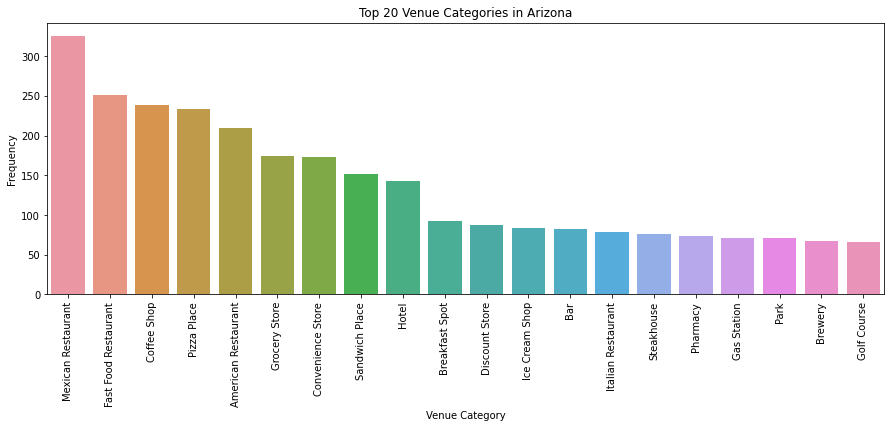

In [ ]:
venues_word = pd.DataFrame(az_venues['Venue_Category'].value_counts().reset_index())
venues_word.columns = ['Venue Category','Frequency']
venues_word.to_csv('./venues_category.txt', sep = ',', index = False)

fig, ax = plt.subplots(figsize = (15,5))

sns.barplot(x= 'Venue Category', y='Frequency', data = venues_word[:20])
ax.set_xticklabels(labels = venues_word['Venue Category'][:20], rotation = 90)
plt.title('Top 20 Venue Categories in Arizona')
plt.show()
fig.savefig('./venues.jpg', dpi = 500, bbox_inches = 'tight')

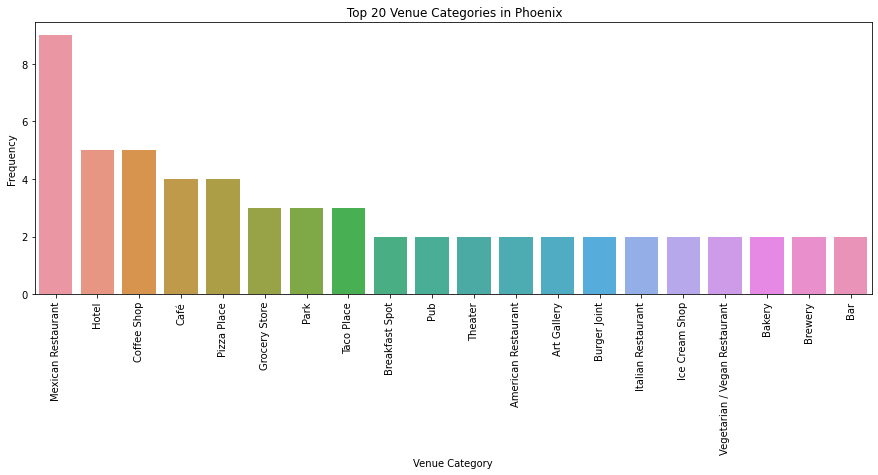

In [ ]:
Phoenix = az_venues[az_venues['Neighborhood'] == 'Phoenix']
Phoenix_word = pd.DataFrame(Phoenix['Venue_Category'].value_counts().reset_index())
Phoenix_word.columns = ['Venue Category','Frequency'] 
Phoenix_word.to_csv('./phoenix_venues_category.txt', sep = ',', index = False)

fig, ax = plt.subplots(figsize = (15,5))

sns.barplot(x= 'Venue Category', y='Frequency', data = Phoenix_word[:20])
ax.set_xticklabels(labels = Phoenix_word['Venue Category'][:20], rotation = 90)
plt.title(' Top 20 Venue Categories in Phoenix')
plt.show()
fig.savefig('./Phoenix_venues.jpg', dpi = 500, bbox_inches = 'tight')

In [ ]:
phoenix_vicinity_venues = pd.concat([vicinity_venues, coffee_vicinity_venues])
phoenix_vicinity_venues.shape

(2256, 9)

# **Modeling**


**One Hot Encoding to Analyze Each Neighborhood**

In [ ]:
# one hot encoding
phoenix_vc_onehot = pd.get_dummies(phoenix_vicinity_venues[['Venue_Category']], prefix="", prefix_sep="") 

# add neighborhood column back to dataframe
phoenix_vc_onehot['Neighborhood'] = phoenix_vicinity_venues['Neighborhood']

# move neighborhood column to the first column
fixed_columns = [phoenix_vc_onehot.columns[-1]] + list(phoenix_vc_onehot.columns[:-1])
phoenix_vc_onehot = phoenix_vc_onehot[fixed_columns]
phoenix_vc_onehot.set_index(['Neighborhood'], inplace = True)

print(phoenix_vc_onehot.shape)
phoenix_vc_onehot.head()

(2256, 222)


Zoo  ATM  Adult Boutique  Advertising Agency  \
Neighborhood                                                    
Apache Junction    0    0               0                   0   
Apache Junction    0    0               0                   0   
Apache Junction    0    0               0                   0   
Apache Junction    0    0               0                   0   
Apache Junction    0    0               0                   0   

                 American Restaurant  Antique Shop  Arcade  Art Gallery  \
Neighborhood                                                              
Apache Junction                    0             0       0            0   
Apache Junction                    0             0       0            0   
Apache Junction                    0             0       0            0   
Apache Junction                    0             0       0            0   
Apache Junction                    0             0       0            0   

                 Art Museum  Arts & Crafts Store  Asian Restaurant  \
Neighborhood                                                         
Apache Junction           0                    0                 0   
Apache Junction           0                    0                 0   
Apache Junction           0                    0                 0   
Apache Junction           0                    0                 0   
Apache Junction           0                    0                 0   

                 Athletics & Sports  BBQ Joint  Bagel Shop  Bakery  Bank  Bar  \
Neighborhood                                                                    
Apache Junction                   0          0           0       0     0    1   
Apache Junction                   0          0           0       0     0    0   
Apache Junction                   0          0           0       0     0    0   
Apache Junction                   0          0           0       0     0    0   
Apache Junction                   0          0           0       0     0    0   

                 Baseball Field  Baseball Stadium  Basketball Stadium  \
Neighborhood                                                            
Apache Junction               0                 0                   0   
Apache Junction               0                 0                   0   
Apache Junction               0                 0                   0   
Apache Junction               0                 0                   0   
Apache Junction               0                 0                   0   

                 Beer Bar  Beer Store  Big Box Store  Bike Shop  Bistro  \
Neighborhood                                                              
Apache Junction         0           0              0          0       0   
Apache Junction         0           0              0          0       0   
Apache Junction         0           0              0          0       0   
Apache Junction         0           0              0          0       0   
Apache Junction         0           0              0          0       0   

                 Bookstore  Botanical Garden  Boutique  Bowling Alley  \
Neighborhood                                                            
Apache Junction          0                 0         0              0   
Apache Junction          0                 0         0              0   
Apache Junction          0                 0         0              0   
Apache Junction          0                 0         0              0   
Apache Junction          0                 0         0              0   

                 Breakfast Spot  Brewery  Bubble Tea Shop  Buffet  Building  \
Neighborhood                                                                  
Apache Junction               0        0                0       0         0   
Apache Junction               0        0                0       0         0   
Apache Junction               0        0                0       0         0   
Apache Junction               0

In [ ]:
phoenix_vc_grouped = phoenix_vc_onehot.groupby('Neighborhood').mean().reset_index()
print(phoenix_vc_grouped.shape)
phoenix_vc_grouped

(24, 223)


Neighborhood   Zoo       ATM  Adult Boutique  Advertising Agency  \
0   Apache Junction  0.00  0.000000            0.00                0.00   
1          Avondale  0.00  0.000000            0.00                0.00   
2           Buckeye  0.00  0.020408            0.00                0.00   
3          Carefree  0.00  0.000000            0.00                0.00   
4        Cave Creek  0.00  0.000000            0.00                0.00   
5          Chandler  0.00  0.000000            0.00                0.00   
6         El Mirage  0.00  0.000000            0.00                0.00   
7    Fountain Hills  0.00  0.000000            0.00                0.00   
8           Gilbert  0.00  0.000000            0.00                0.00   
9          Glendale  0.00  0.000000            0.00                0.00   
10         Goodyear  0.00  0.000000            0.00                0.00   
11        Guadalupe  0.00  0.000000            0.00                0.00   
12  Litchfield Park  0.00  0.000000            0.00                0.00   
13         Maricopa  0.00  0.000000            0.00                0.00   
14             Mesa  0.00  0.000000            0.00                0.00   
15  Paradise Valley  0.00  0.000000            0.00                0.00   
16           Peoria  0.00  0.000000            0.00                0.00   
17          Phoenix  0.00  0.000000            0.00                0.00   
18      Queen Creek  0.00  0.000000            0.00                0.00   
19       Scottsdale  0.00  0.000000            0.00                0.01   
20         Surprise  0.00  0.000000            0.00                0.00   
21            Tempe  0.01  0.000000            0.00                0.00   
22         Tolleson  0.00  0.000000            0.01                0.00   
23        Youngtown  0.00  0.000000            0.00                0.00   

    American Restaurant  Antique Shop  Arcade  Art Gallery  Art Museum  \
0              0.027778      0.013889    0.00         0.00        0.00   
1              0.050000      0.010000    0.00         0.00        0.00   
2              0.000000      0.000000    0.00         0.00        0.00   
3              0.050000      0.010000    0.00         0.01        0.00   
4              0.060000      0.010000    0.00         0.01        0.00   
5              0.020000      0.000000    0.00         0.00        0.00   
6              0.020000      0.000000    0.00         0.00        0.00   
7              0.058140      0.000000    0.00         0.00        0.00   
8              0.010000      0.000000    0.00         0.00        0.00   
9              0.040000      0.000000    0.00         0.00        0.00   
10             0.050000      0.010000    0.00         0.00        0.00   
11             0.020000      0.000000    0.00         0.00        0.00   
12             0.040000      0.010000    0.00         0.00        0.00   
13             0.060606      0.000000    0.00         0.00        0.00   
14             0.020000      0.010000    0.00         0.00        0.00   
15             0.070000      0.000000    0.00         0.00        0.00   
16             0.050000      0.000000    0.00         0.00        0.00   
17             0.020000      0.000000    0.00         0.02        0.01   
18             0.012048      0.000000    0.00         0.00        0.00   
19             0.030000      0.000000    0.00         0.00        0.00   
20             0.040000      0.000000    0.00         0.00        0.00   
21             0.030000      0.000000    0.00         0.00        0.00   
22             0.020000      0.000000    0.01         0.00        0.00   
23             0.070000      0.000000    0.00         0.00        0.00   

    Arts & Crafts Store  Asian Restaurant  Athletics & Sports  BBQ Joint  \
0                  0.00          0.000000            0.000000   0.000000   
1                  0.00          0.020000            0.010000   0.010000   
2                  0.00          0.000000           

**Top 5 most common venues across neighborhoods**

In [ ]:
num_top_venues = 5

for hood in phoenix_vc_grouped['Neighborhood']:
    print('==========================================')
    print("\t\t"+hood+"")
    print('==========================================\n')
    temp = phoenix_vc_grouped[phoenix_vc_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['Venue','Frequency']
    temp = temp.iloc[1:]
    temp['Frequency'] = temp['Frequency'].astype(float)
    temp = temp.round({'Frequency': 2})
    print(temp.sort_values('Frequency', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

		Apache Junction

                  Venue  Frequency
0  Fast Food Restaurant       0.08
1        Sandwich Place       0.07
2                 Trail       0.07
3         Grocery Store       0.06
4           Pizza Place       0.06


		Avondale

                  Venue  Frequency
0           Coffee Shop       0.07
1  Fast Food Restaurant       0.06
2    Mexican Restaurant       0.06
3   American Restaurant       0.05
4                   Gym       0.05


		Buckeye

                  Venue  Frequency
0           Pizza Place       0.12
1  Fast Food Restaurant       0.10
2    Mexican Restaurant       0.08
3        Discount Store       0.06
4           Coffee Shop       0.06


		Carefree

                 Venue  Frequency
0          Coffee Shop       0.10
1          Golf Course       0.06
2  American Restaurant       0.05
3   Mexican Restaurant       0.04
4        Grocery Store       0.04


		Cave Creek

                 Venue  Frequency
0          Coffee Shop       0.10
1  American Restaurant

**Now let's create the new dataframe and display the top 10 venues for each neighborhood.**

In [ ]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# creating columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# creating a new dataframe
neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = phoenix_vc_grouped['Neighborhood']

for ind in np.arange(phoenix_vc_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(phoenix_vc_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted

Neighborhood 1st Most Common Venue 2nd Most Common Venue  \
0   Apache Junction  Fast Food Restaurant        Sandwich Place   
1          Avondale           Coffee Shop    Mexican Restaurant   
2           Buckeye           Pizza Place  Fast Food Restaurant   
3          Carefree           Coffee Shop           Golf Course   
4        Cave Creek           Coffee Shop   American Restaurant   
5          Chandler    Mexican Restaurant           Pizza Place   
6         El Mirage    Mexican Restaurant         Grocery Store   
7    Fountain Hills           Pizza Place           Golf Course   
8           Gilbert           Coffee Shop    Mexican Restaurant   
9          Glendale    Mexican Restaurant  Fast Food Restaurant   
10         Goodyear           Coffee Shop    Mexican Restaurant   
11        Guadalupe         Grocery Store           Pizza Place   
12  Litchfield Park           Coffee Shop    Mexican Restaurant   
13         Maricopa           Pizza Place  Fast Food Restaurant   
14             Mesa    Mexican Restaurant               Brewery   
15  Paradise Valley   American Restaurant           Pizza Place   
16           Peoria    Mexican Restaurant           Pizza Place   
17          Phoenix    Mexican Restaurant                 Hotel   
18      Queen Creek    Mexican Restaurant           Pizza Place   
19       Scottsdale           Coffee Shop                   Bar   
20         Surprise           Coffee Shop    Mexican Restaurant   
21            Tempe           Coffee Shop               Brewery   
22         Tolleson           Coffee Shop  Fast Food Restaurant   
23        Youngtown    Mexican Restaurant   American Restaurant   

   3rd Most Common Venue 4th Most Common Venue 5th Most Common Venue  \
0                  Trail              Pharmacy         Grocery Store   
1   Fast Food Restaurant   American Restaurant                   Gym   
2     Mexican Restaurant           Gas Station        Discount Store   
3    American Restaurant         Grocery Store    Mexican Restaurant   
4            Golf Course    Mexican Restaurant             BBQ Joint   
5            Coffee Shop         Grocery Store                  Café   
6      Convenience Store           Coffee Shop        Sandwich Place   
7    American Restaurant    Mexican Restaurant           Coffee Shop   
8            Pizza Place         Grocery Store        Sandwich Place   
9    American Restaurant     Convenience Store                  Park   
10   American Restaurant  Fast Food Restaurant                   Gym   
11    Italian Restaurant        Breakfast Spot    Mexican Restaurant   
12           Pizza Place                   Gym   American Restaurant   
13   American Restaurant            Donut Shop  Gym / Fitness Center   
14  Fast Food Restaurant     Convenience Store        Sandwich Place   
15        Breakfast Spot                 Hotel         Grocery Store   
16  Fast Food Restaurant         Grocery Store   American Restaurant   
17           Coffee Shop                  Café           Pizza Place   
18              Pharmacy           Coffee Shop        Sandwich Place   
19    Mexican Restaurant                 Hotel           Pizza Place   
20           Pizza Place         Grocery Store              Pharmacy   
21        Sandwich Place                  Park           Pizza Place   
22     Convenience Store    Mexican Restaurant         Grocery Store   
23           Pizza Place         Grocery Store           Coffee Shop   

   6th Most Common Venue 7th Most Common Venue 8th Most Common Venue  \
0            Pizza Place     Convenience Store    Mexican Restaurant   
1            Pizza Place     Convenience Store    Frozen Yogurt Shop   
2            Coffee Shop                  Bank              Pharmacy   
3      Convenience Store             BBQ Joint        Sandwich Place   
4                  Diner        Sandwich Place     Convenience Store   
5               Beer Bar  Fast Food Restaurant        Sandwich Place   
6            Pizza Place  

**Clustering Neighborhoods**

**K-Means Clustering**

In cluster analysis, the elbow method is a heuristic used in determining the number of clusters in a data set. The method consists of plotting the explained variation as a function of the number of clusters, and picking the elbow of the curve as the number of clusters to use.

1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 

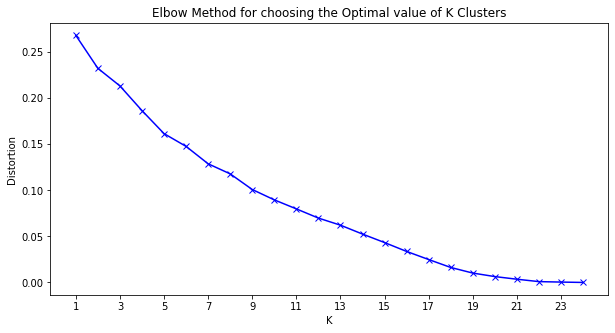

In [ ]:
phoenix_vc_clustering = phoenix_vc_grouped.drop('Neighborhood',1)

Distortion = []
K = range(1,25)
for k in K:
    print(k, end=' ')
    kmeans = KMeans(n_clusters=k).fit(phoenix_vc_clustering)
    Distortion.append(kmeans.inertia_)
   
plt.figure(figsize = (10,5))
plt.plot(K, Distortion, 'bx-')
plt.xticks(np.arange(min(K), max(K)+1, 2.0))
plt.xlabel('K')
plt.ylabel('Distortion')
plt.title('Elbow Method for choosing the Optimal value of K Clusters');

**Silhouette Coefficient**

To find the optimal value of the number of clusters, k, the number of clusters is iterated and the corresponding Silhouette Coefficient is calculated for each of the k-values. The highest Silhouette Coefficient gives the best match to its own cluster.

2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 

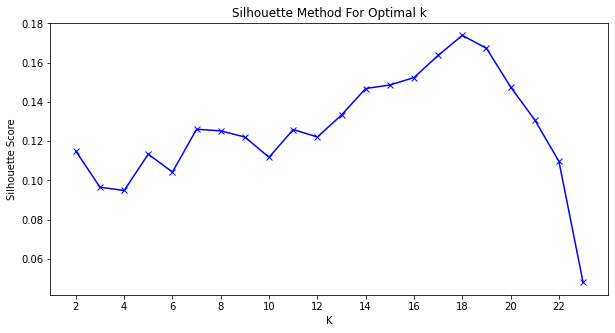

In [ ]:
sil = []
K_sil = range(2,24)
# minimum 2 clusters required, to define dissimilarity
for k in K_sil:
    print(k, end=' ')
    kmeans = KMeans(n_clusters = k).fit(phoenix_vc_clustering)
    labels = kmeans.labels_
    sil.append(silhouette_score(phoenix_vc_clustering, labels, metric = 'euclidean'))

plt.figure(figsize = (10,5))
plt.plot(K_sil, sil, 'bx-')
plt.xticks(np.arange(min(K_sil), max(K_sil)+1, 2.0))
plt.xlabel('K')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Method For Optimal k')
plt.show()

**Clustering Analysis**

In [ ]:
# set number of clusters
kclusters = 5
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(phoenix_vc_clustering)

# check cluster labels generated for each row in the dataframe
kmeans.labels_[:]

array([4, 1, 0, 2, 2, 3, 3, 2, 3, 3, 1, 3, 1, 0, 3, 1, 3, 3, 3, 1, 3, 1,
       3, 3], dtype=int32)

In [ ]:
phoenix_neighborhood = phoenix_vicinity_venues.iloc[:,:4]
phoenix_neighborhood.drop_duplicates(subset = 'Neighborhood', keep = 'first', inplace = True)
phoenix_neighborhood.reset_index(drop = True, inplace = True)
print(phoenix_neighborhood.shape)
phoenix_neighborhood.head()

(24, 4)


Borough     Neighborhood   Latitude   Longitude
0     Pinal  Apache Junction  33.415048 -111.549578
1  Maricopa         Avondale  33.435499 -112.349557
2  Maricopa          Buckeye  33.370275 -112.583867
3  Maricopa         Carefree  33.822261 -111.918203
4  Maricopa       Cave Creek  33.833333 -111.950833

In [ ]:
# add clustering labels
try:
    neighborhoods_venues_sorted.drop('Cluster Labels', axis=1)
except:
    neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

phoenix_merge = phoenix_neighborhood

phoenix_merge = phoenix_merge.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')
print(phoenix_merge.shape)
phoenix_merge = phoenix_merge.dropna()
phoenix_merge # check the last columns!

(24, 15)


Borough     Neighborhood   Latitude   Longitude  Cluster Labels  \
0      Pinal  Apache Junction  33.415048 -111.549578               4   
1   Maricopa         Avondale  33.435499 -112.349557               1   
2   Maricopa          Buckeye  33.370275 -112.583867               0   
3   Maricopa         Carefree  33.822261 -111.918203               2   
4   Maricopa       Cave Creek  33.833333 -111.950833               2   
5   Maricopa         Chandler  33.306222 -111.841332               3   
6   Maricopa        El Mirage  33.613034 -112.324487               3   
7   Maricopa   Fountain Hills  33.611711 -111.717361               2   
8   Maricopa          Gilbert  33.352763 -111.789037               3   
9   Maricopa         Glendale  33.538686 -112.185994               3   
10  Maricopa         Goodyear  33.435367 -112.357601               1   
11  Maricopa        Guadalupe  33.363125 -111.962533               3   
12  Maricopa  Litchfield Park  33.493380 -112.358124               1   
13     Pinal         Maricopa  33.058129 -112.047755               0   
14  Maricopa             Mesa  33.415112 -111.831477               3   
15  Maricopa  Paradise Valley  33.542801 -111.955600               1   
16  Maricopa           Peoria  33.580612 -112.237294               3   
17  Maricopa          Phoenix  33.448437 -112.074142               3   
18  Maricopa      Queen Creek  33.248386 -111.634158               3   
19  Maricopa       Scottsdale  33.494219 -111.926018               1   
20  Maricopa         Surprise  33.629227 -112.368019               3   
21  Maricopa            Tempe  33.425506 -111.940012               1   
22  Maricopa         Tolleson  33.450050 -112.259309               3   
23  Maricopa        Youngtown  33.593730 -112.303326               3   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0   Fast Food Restaurant        Sandwich Place                 Trail   
1            Coffee Shop    Mexican Restaurant  Fast Food Restaurant   
2            Pizza Place  Fast Food Restaurant    Mexican Restaurant   
3            Coffee Shop           Golf Course   American Restaurant   
4            Coffee Shop   American Restaurant           Golf Course   
5     Mexican Restaurant           Pizza Place           Coffee Shop   
6     Mexican Restaurant         Grocery Store     Convenience Store   
7            Pizza Place           Golf Course   American Restaurant   
8            Coffee Shop    Mexican Restaurant           Pizza Place   
9     Mexican Restaurant  Fast Food Restaurant   American Restaurant   
10           Coffee Shop    Mexican Restaurant   American Restaurant   
11         Grocery Store           Pizza Place    Italian Restaurant   
12           Coffee Shop    Mexican Restaurant           Pizza Place   
13           Pizza Place  Fast Food Restaurant   American Restaurant   
14    Mexican Restaurant               Brewery  Fast Food Restaurant   
15   American Restaurant           Pizza Place        Breakfast Spot   
16    Mexican Restaurant           Pizza Place  Fast Food Restaurant   
17    Mexican Restaurant                 Hotel           Coffee Shop   
18    Mexican Restaurant           Pizza Place              Pharmacy   
19           Coffee Shop                   Bar    Mexican Restaurant   
20           Coffee Shop    Mexican Restaurant           Pizza Place   
21           Coffee Shop               Brewery        Sandwich Place   
22           Coffee Shop  Fast Food Restaurant     Convenience Store   
23    Mexican Restaurant   American Restaurant           Pizza Place   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0               Pharmacy         Grocery Store           Pizza Place   
1    American Restaurant                   Gym           Pizza Place   
2            Gas Station        Discount Store           Coffee Shop   
3          Grocery Store    Mexican Restaurant     Convenience Store   
4     Mexican Restaurant             BBQ Jo

**Visualizing the Clusters**

In [ ]:
phoenix_cluster_map = folium.Map(location = [latitude, longitude], zoom_start = 9.4)
color_map = { 0: 'yellow', 1: 'red', 2:'blue', 3:'orange', 4: 'green'}

# add venues to the map
markers_colors = []
for neighborhood, borough, cluster, latitude, longitude in zip(phoenix_merge['Neighborhood'], 
                                                        phoenix_merge['Borough'], 
                                                        phoenix_merge['Cluster Labels'], 
                                                        phoenix_merge['Latitude'], 
                                                        phoenix_merge['Longitude']):
    label = folium.Popup(str(neighborhood) + ', ' + str(borough), parse_html = True)
    folium.CircleMarker(
        [latitude, longitude],
        radius = 6,
        popup = label,
        color = color_map[cluster],
        fill = True,
        fill_color = color_map[cluster],
        fill_opacity = 0.7).add_to(phoenix_cluster_map)

phoenix_cluster_map.add_child(minimap)
phoenix_cluster_map.save(os.path.join('./', 'map_6.html'))
phoenix_cluster_map

# **Analysis**

Examining the resulting clusters

**Cluster 1**

In [ ]:
display(phoenix_merge[phoenix_merge['Cluster Labels'] == 0].shape)
phoenix_merge[phoenix_merge['Cluster Labels'] == 0]

(2, 15)

Borough Neighborhood   Latitude   Longitude  Cluster Labels  \
2   Maricopa      Buckeye  33.370275 -112.583867               0   
13     Pinal     Maricopa  33.058129 -112.047755               0   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
2            Pizza Place  Fast Food Restaurant    Mexican Restaurant   
13           Pizza Place  Fast Food Restaurant   American Restaurant   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
2            Gas Station        Discount Store           Coffee Shop   
13            Donut Shop  Gym / Fitness Center    Mexican Restaurant   

   7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
2                   Bank              Pharmacy        Sandwich Place   
13           Wings Joint        Sandwich Place              Pharmacy   

   10th Most Common Venue  
2             Wings Joint  
13            Coffee Shop

**Cluster 2**

In [ ]:
display(phoenix_merge[phoenix_merge['Cluster Labels'] == 1].shape)
phoenix_merge[phoenix_merge['Cluster Labels'] == 1]

(6, 15)

Borough     Neighborhood   Latitude   Longitude  Cluster Labels  \
1   Maricopa         Avondale  33.435499 -112.349557               1   
10  Maricopa         Goodyear  33.435367 -112.357601               1   
12  Maricopa  Litchfield Park  33.493380 -112.358124               1   
15  Maricopa  Paradise Valley  33.542801 -111.955600               1   
19  Maricopa       Scottsdale  33.494219 -111.926018               1   
21  Maricopa            Tempe  33.425506 -111.940012               1   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
1            Coffee Shop    Mexican Restaurant  Fast Food Restaurant   
10           Coffee Shop    Mexican Restaurant   American Restaurant   
12           Coffee Shop    Mexican Restaurant           Pizza Place   
15   American Restaurant           Pizza Place        Breakfast Spot   
19           Coffee Shop                   Bar    Mexican Restaurant   
21           Coffee Shop               Brewery        Sandwich Place   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
1    American Restaurant                   Gym           Pizza Place   
10  Fast Food Restaurant                   Gym           Pizza Place   
12                   Gym   American Restaurant         Grocery Store   
15                 Hotel         Grocery Store                 Trail   
19                 Hotel           Pizza Place                  Park   
21                  Park           Pizza Place   American Restaurant   

   7th Most Common Venue 8th Most Common Venue      9th Most Common Venue  \
1      Convenience Store    Frozen Yogurt Shop         Seafood Restaurant   
10           Golf Course    Frozen Yogurt Shop              Grocery Store   
12  Fast Food Restaurant           Golf Course        Japanese Restaurant   
15    Mexican Restaurant                   Spa                 Steakhouse   
19            Restaurant   American Restaurant    New American Restaurant   
21     Convenience Store                   Bar  Middle Eastern Restaurant   

   10th Most Common Venue  
1              Donut Shop  
10      Convenience Store  
12       Sushi Restaurant  
15             Restaurant  
19       Sushi Restaurant  
21     Mexican Restaurant

**Cluster 3**

In [ ]:
display(phoenix_merge[phoenix_merge['Cluster Labels'] == 2].shape)
phoenix_merge[phoenix_merge['Cluster Labels'] == 2]

(3, 15)

Borough    Neighborhood   Latitude   Longitude  Cluster Labels  \
3  Maricopa        Carefree  33.822261 -111.918203               2   
4  Maricopa      Cave Creek  33.833333 -111.950833               2   
7  Maricopa  Fountain Hills  33.611711 -111.717361               2   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
3           Coffee Shop           Golf Course   American Restaurant   
4           Coffee Shop   American Restaurant           Golf Course   
7           Pizza Place           Golf Course   American Restaurant   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
3         Grocery Store    Mexican Restaurant     Convenience Store   
4    Mexican Restaurant             BBQ Joint                 Diner   
7    Mexican Restaurant           Coffee Shop         Grocery Store   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
3             BBQ Joint        Sandwich Place           Pizza Place   
4        Sandwich Place     Convenience Store         Grocery Store   
7    Italian Restaurant                  Bank     Convenience Store   

  10th Most Common Venue  
3                    Bar  
4            Pizza Place  
7                 Casino

**Cluster 4**

In [ ]:
display(phoenix_merge[phoenix_merge['Cluster Labels'] == 3].shape)
phoenix_merge[phoenix_merge['Cluster Labels'] == 3]

(12, 15)

Borough Neighborhood   Latitude   Longitude  Cluster Labels  \
5   Maricopa     Chandler  33.306222 -111.841332               3   
6   Maricopa    El Mirage  33.613034 -112.324487               3   
8   Maricopa      Gilbert  33.352763 -111.789037               3   
9   Maricopa     Glendale  33.538686 -112.185994               3   
11  Maricopa    Guadalupe  33.363125 -111.962533               3   
14  Maricopa         Mesa  33.415112 -111.831477               3   
16  Maricopa       Peoria  33.580612 -112.237294               3   
17  Maricopa      Phoenix  33.448437 -112.074142               3   
18  Maricopa  Queen Creek  33.248386 -111.634158               3   
20  Maricopa     Surprise  33.629227 -112.368019               3   
22  Maricopa     Tolleson  33.450050 -112.259309               3   
23  Maricopa    Youngtown  33.593730 -112.303326               3   

   1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
5     Mexican Restaurant           Pizza Place           Coffee Shop   
6     Mexican Restaurant         Grocery Store     Convenience Store   
8            Coffee Shop    Mexican Restaurant           Pizza Place   
9     Mexican Restaurant  Fast Food Restaurant   American Restaurant   
11         Grocery Store           Pizza Place    Italian Restaurant   
14    Mexican Restaurant               Brewery  Fast Food Restaurant   
16    Mexican Restaurant           Pizza Place  Fast Food Restaurant   
17    Mexican Restaurant                 Hotel           Coffee Shop   
18    Mexican Restaurant           Pizza Place              Pharmacy   
20           Coffee Shop    Mexican Restaurant           Pizza Place   
22           Coffee Shop  Fast Food Restaurant     Convenience Store   
23    Mexican Restaurant   American Restaurant           Pizza Place   

   4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
5          Grocery Store                  Café              Beer Bar   
6            Coffee Shop        Sandwich Place           Pizza Place   
8          Grocery Store        Sandwich Place  Fast Food Restaurant   
9      Convenience Store                  Park         Grocery Store   
11        Breakfast Spot    Mexican Restaurant        Ice Cream Shop   
14     Convenience Store        Sandwich Place            Steakhouse   
16         Grocery Store   American Restaurant           Coffee Shop   
17                  Café           Pizza Place            Taco Place   
18           Coffee Shop        Sandwich Place    Salon / Barbershop   
20         Grocery Store              Pharmacy  Fast Food Restaurant   
22    Mexican Restaurant         Grocery Store           Pizza Place   
23         Grocery Store           Coffee Shop        Sandwich Place   

   7th Most Common Venue 8th Most Common Venue   9th Most Common Venue  \
5   Fast Food Restaurant        Sandwich Place        Sushi Restaurant   
6   Fast Food Restaurant              Pharmacy                    Park   
8      Convenience Store                   Bar        Sushi Restaurant   
9            Pizza Place                   Bar  Furniture / Home Store   
11            Steakhouse     Convenience Store             Coffee Shop   
14     Korean Restaurant           Pizza Place           Grocery Store   
16        Sandwich Place     Convenience Store                    Park   
17                  Park         Grocery Store      Italian Restaurant   
18    Italian Restaurant           Golf Course  Furniture / Home Store   
20   American Restaurant        Ice Cream Shop             Golf Course   
22        Hardware Store          Burger Joint  Furniture / Home Store   
23     Convenience Store              Pharmacy    Fast Food Restaurant   

             10th Most Common Venue  
5                Chinese Restaurant  
6                    Ice Cream Shop  
8                           Brewery  
9                    Sandwich Place  
11           Furniture / Home Store  
14                      Coffee Shop  
16               

**Cluster 5**

In [ ]:
display(phoenix_merge[phoenix_merge['Cluster Labels'] == 4].shape)
phoenix_merge[phoenix_merge['Cluster Labels'] == 4]

(1, 15)

Borough     Neighborhood   Latitude   Longitude  Cluster Labels  \
0   Pinal  Apache Junction  33.415048 -111.549578               4   

  1st Most Common Venue 2nd Most Common Venue 3rd Most Common Venue  \
0  Fast Food Restaurant        Sandwich Place                 Trail   

  4th Most Common Venue 5th Most Common Venue 6th Most Common Venue  \
0              Pharmacy         Grocery Store           Pizza Place   

  7th Most Common Venue 8th Most Common Venue 9th Most Common Venue  \
0     Convenience Store    Mexican Restaurant        Breakfast Spot   

  10th Most Common Venue  
0                    Spa

# **Discussion**

***Based on our analysis above, we can draw a number of conclusions that will be useful to aid any visitor visiting the city of Phoenix, Arizona.***

After collecting data from the Wikipedia, we got a list of 90 neighborhoods which were in turn fed into Geopy to retrieve the latitude and longitude values and remove all the outliers. Finally, we explored the venues in each neighborhood with the help of Foursquare API gathered nearly 5000 venues. 


We identified that from the total set of venues, majority of them were Coffee Shops and Mexican Restaurants. A visitor who loves Coffee/Mexican Restaurants would surely benefit from coming to Phoenix.

***The results from k-means clustering show that we can categorize Phoenix neighborhoods into 5 clusters based on how many Coffee Shops are in each neighborhood:***

<br/>

**Cluster 1:** Neighborhoods with little Coffee Shops

**Cluster 2:** Neighborhoods with high number of Coffee Shops

**Cluster 3:** Neighborhoods with high number of Coffee Shops

**Cluster 4:** Neighborhoods with high number of Coffee Shops

**Cluster 5:** Neighborhoods with little Coffee Shops

<br/>

The results are visualized in the above map with Cluster 1 in yellow color, Cluster 2 in red color, Cluster 3 in blue color, Cluster 4 in orange color and Cluster 5 in green color.

**According to this analysis, Cluster 1 and 5  will provide least competition for an upcoming coffee shop as pizza place and American restaurants are the most common venues in this area and, the frequency of coffee shops as common venue are very low compared to the remaining neighborhood.**

# Limitations and Suggestions for Future Research


In this capstone project, I only take into consideration of one factor - the occurrence / existence of Coffee Shops in each neighborhood. There are many factors that can be taken into consideration such as population density, income of residents, rent that could influence the decision to open a coffee shop. However, to put all these data into this project is not possible to do within a short time frame for this capstone project. Future research can take into consideration of these factors.

<br/>

Here is a picture showing the frequency where people living in Phoenix work![](https://www.azmag.gov/Portals/0/img/LWPJC/live_in_PHOENIX.jpg) 

# **Conclusion**

To conclude this project, we have got a small glimpse of how real life data-science projects look like. I’ve made use of some frequently used python libraries to scrap web-data, use Foursquare API to explore the major neighborhoods of Phoenix and saw the results of segmentation of neighborhoods using Folium map. We further shortlist the neighborhoods based on the common venues and perform machine learning by utilizing k-means clustering to choose a neighborhood which best suits the business problem. Potential for this kind of analysis in a real life business problem is discussed in great detail.

Finally, since my analysis were mostly concentrated on the possibilities of opening a coffee shop targeting the huge pool of office workers and students around Downtown Phoenix, some of the results obtained are surprisingly exactly what I have expected after staying 2 years in Phoenix. Hopefully, this kind of analysis will provide you initial guidance to take more real-life challenges using data-science.
